# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

Initial analysis of the data through simple manual inspection.

In [1]:
#Packages used to solve the exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import requests
import datetime

In [2]:
transactions = pd.read_csv('data/transactions.csv')
num_trans = len(transactions.index)
print('The dataset contains {} transactions'.format(num_trans))
transactions.head(25)

The dataset contains 20568 transactions


,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55
5,16729-167,Chatterbridge,Spain,Barcelona,359.52€,2016-01-02 07:20:59
6,52125-444,Voomm,France,Paris,266.62€,2016-01-02 07:40:37
7,43419-018,Buzzbean,Germany,Düsseldorf,103.45€,2016-01-02 08:57:57
8,54092-515,Zooxo,United Kingdom,London,£704.94,2016-01-02 09:09:01
9,24286-1562,Lajo,Greece,Thessaloniki,317.65€,2016-01-02 11:01:32


#### Explanation of the data
The data is made from the sales of parts since the beginning of 2016 to 2019 to companies around the world and contains 20568 transactions. The excel sheet include information usch as the part being sold, its price (in varying currency), the timestamp of the transaction, the name of the client company and its location (country and city).

#### Cleaning the data
Below the explanation of the process of cleaning the data.


We start by checking which columns have `NULL` values in them.

In [3]:
#extract columns will null values
null_columns=transactions.columns[transactions.isnull().any()]
print(null_columns)

Index(['part', 'country', 'city', 'price'], dtype='object')


#### Parts

We want to understand more about what the IDs that identify each part actually mean. Seeing that there is a dash between two numbers there might be a correlation of bigger and smaller classification.

We begin by looking if there is something unexpected in the list of parts.

In [4]:
null_parts = transactions[transactions['part'].isnull()]
print("There are {} NULL values in the part column".format(len(null_parts)))
null_parts

There are 10 NULL values in the part column


,part,company,country,city,price,date
14916,NaN,Yozio,Greece,Patras,518.38€,2018-02-17 21:43:43
14917,NaN,Brainsphere,Portugal,Braga,957.24€,2018-02-17 22:12:24
14918,NaN,Lajo,Greece,Thessaloniki,966.06€,2018-02-17 22:54:49
14919,NaN,Roodel,Portugal,Aranhas,873.65€,2018-02-17 23:36:52
17524,NaN,Yozio,Greece,Patras,627.32€,2018-07-12 03:28:46
17525,NaN,Thoughtmix,Portugal,Amadora\t,825.8€,2018-07-12 05:34:07
17526,NaN,Gabcube,Portugal,Almada,188.31€,2018-07-12 06:49:44
17527,NaN,Buzzbean,Germany,Düsseldorf,429.67€,2018-07-12 07:03:50
17528,NaN,Zoonder,United States,Boston,$521.72,2018-07-12 08:38:56
17529,NaN,Twitterbeat,France,Annecy,1031.46€,2018-07-12 09:48:17


We know that the part number is an ID of some sort, so it is likely impossible to reliably reverse engineer from the data available the IDs that are missing. Furthermore, there are only 10 instances of this issue. We therefore decide to drop these rows. This is such a small fraction of the dataset that this should not affect it.

In [5]:
transactions.drop(transactions.index[transactions['part'].isnull()].tolist(), inplace=True)

We now proceed to look at the parts.

In [6]:
parts = transactions.sort_values(by=["part"])["part"]
parts = pd.unique(parts)
print("There are {} distinct part numbers.".format(len(parts)))

There are 100 distinct part numbers.


Let's look into the meaning of the numbers, maybe there is a correlation between a number being before the dash and it being a category of the part.

In [7]:
categories = []
sub_category = []
for part in parts:
    split = part.split("-")
    categories.append(split[0])
    sub_category.append(split[1])    
categories = pd.DataFrame(categories, columns = ["category"])
sub_category = pd.DataFrame(sub_category, columns = ["sub_category"])

print("Number of \"categories\": {}".format(len(pd.unique(categories["category"]))))
print("Number of \"sub-categories\": {}".format(len(pd.unique(sub_category["sub_category"]))))

Number of "categories": 83
Number of "sub-categories": 97


There are less "categories" than the total number of parts but not a significant enough difference. This is why we decide to store the part identifier as a string.

#### Company
From the preliminary analysis we know that there are no `NULL` values in this colums, but we can see some clear typos in the names of the companies. To make sure they are typos we check where they are located, to have more clues supporting the theory that they are in fact the same company but it was miss-typed. This also helps in determining which name is the correct one.

In [8]:
companies = transactions.sort_values(by=["company"])["company"]
companies = pd.unique(companies)
print(companies)

[' -' ' a' 'Avaveo' 'Brainsphere' 'Bubblemix' 'Buzzbean' 'Chatterbridge'
 'Eimbee' 'Flipstorm' 'Gabcube' 'Gabtune' 'Gevee' 'Innojam' 'Kanoodle'
 'Laj0' 'Lajo' 'Ntags' 'Ntagz' 'Realpoint' 'Rhycero' 'Riffpath' 'Roodel'
 'Shufflebeat' 'Tagtune' 'Teklist' 'Thoughtmix' 'Thoughtmixz'
 'Twitterbeat' 'Voomm' 'Wordify' 'Yozio' 'Zoonder' 'Zooxo' 'Zooxo.' 'aa']


In [9]:
suspicious = ['Lajo', 'Laj0', 'Thoughtmix', 'Thoughtmixz', 'Zooxo', 'Zooxo.', 'Ntags', 'Ntagz', ' a', 'aa',' -']
for company in suspicious:
    print("=====")
    print("Transaction for company {}".format(company))
    print(transactions.loc[transactions['company'] == company, ['company','country', 'price', 'date']].head(2))

=====
Transaction for company Lajo
  company country    price                 date
1    Lajo  Greece  187.99€  2016-01-02 00:05:26
9    Lajo  Greece  317.65€  2016-01-02 11:01:32
=====
Transaction for company Laj0
      company country    price                 date
12882    Laj0  Greece  189.29€  2017-10-24 06:22:42
=====
Transaction for company Thoughtmix
       company   country     price                 date
15  Thoughtmix  Portugal   477.71€  2016-01-02 18:52:45
27  Thoughtmix  Portugal  1146.85€  2016-01-03 10:48:11
=====
Transaction for company Thoughtmixz
           company   country    price                 date
19823  Thoughtmixz  Portugal  506.82€  2018-11-19 16:04:40
=====
Transaction for company Zooxo
   company         country    price                 date
8    Zooxo  United Kingdom  £704.94  2016-01-02 09:09:01
21   Zooxo  United Kingdom  £602.37  2016-01-03 00:49:00
=====
Transaction for company Zooxo.
      company         country    price                 date
12698  Zo

In [10]:
transactions.replace({
    'Laj0': 'Lajo',
    'Zooxo.': 'Zooxo', 
    'Ntagz': 'Ntags', 
    'Thoughtmixz': 'Thoughtmix'
}, inplace=True)

In [11]:
#make sure everything has gone to plan
companies = pd.unique(transactions.sort_values(by=["company"])["company"])
print(companies)

[' -' ' a' 'Avaveo' 'Brainsphere' 'Bubblemix' 'Buzzbean' 'Chatterbridge'
 'Eimbee' 'Flipstorm' 'Gabcube' 'Gabtune' 'Gevee' 'Innojam' 'Kanoodle'
 'Lajo' 'Ntags' 'Realpoint' 'Rhycero' 'Riffpath' 'Roodel' 'Shufflebeat'
 'Tagtune' 'Teklist' 'Thoughtmix' 'Twitterbeat' 'Voomm' 'Wordify' 'Yozio'
 'Zoonder' 'Zooxo' 'aa']


Now to solve the problem with company ` -`.

In [12]:
pd.unique(transactions.loc[transactions['city'] == "Boston"]['company'])

array(['Zoonder', ' -'], dtype=object)

It seems the only two companies based in Boston in the csv are "Zoonder" and " -", which could suggest that " -" is actually a miss-typed "Zoonder". This might be solved by talking to John, and hoping he remembers, but he most likely won't remember.  We decide to ignore this point of data in our analysis as it is only one point of data amoungst tens of thousands. 

Similar considerations for ` a` and `aa`.

In [13]:
transactions.drop(transactions.index[transactions['company'] == ' -'].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['company'] == ' a'].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['company'] == 'aa'].tolist(), inplace=True)

#### Country, city
First we fix typos. The assumption here is that we only want characters and spaces in the name of a city. We first check if there are such occurrencies just to be able to inspect them manually for the purposes of this exercise.

In [14]:
def check_non_digits_spaces(column):
    non_digits_spaces = []
    print("Looking at column \"{}\"...".format(column))
    found_non_digits_spaces = False
    not_digits_spaces =list(re.findall(r"[^ \w]", str(x)) for x in transactions[column])
    for i in not_digits_spaces:
        if len(i)>0:
            non_digits_spaces.append(i)
            found_non_digits_spaces = True
    if not found_non_digits_spaces:
        print("NO non-digits or non-spaces were found in the column \"{}\"".format(column))
    else:
        print("non-digits or non-spaces were found in the column \"{}\"".format(column))
    return non_digits_spaces

In [15]:
non_digits_spaces_country = check_non_digits_spaces("country")

Looking at column "country"...
NO non-digits or non-spaces were found in the column "country"


In [16]:
non_digits_spaces_country = check_non_digits_spaces("city")

Looking at column "city"...
non-digits or non-spaces were found in the column "city"


We fix by removing these unwanted characters.

In [17]:
transactions["city"].replace(r"[^ \w]",r"", regex = True, inplace = True)
transactions["country"].replace(r"[^ \w]",r"", regex = True, inplace = True)
non_digits_spaces_country = check_non_digits_spaces("country")
non_digits_spaces_city = check_non_digits_spaces("city")

Looking at column "country"...
NO non-digits or non-spaces were found in the column "country"
Looking at column "city"...
NO non-digits or non-spaces were found in the column "city"


In [18]:
null_countries = transactions[transactions['country'].isnull()]
print("There are {} NULL values in the \"country\" column".format(len(null_countries)))
null_countries.head(5)

There are 2171 NULL values in the "country" column


,part,company,country,city,price,date
2528,52380-1102,Teklist,NaN,Arnhem,357.78,2016-04-21 04:07:31
2947,52125-136,Brainsphere,NaN,Braga,493.94€,2016-05-10 11:13:43
2956,16714-295,Teklist,NaN,Arnhem,624.4€,2016-05-10 21:57:15
2994,76335-006,Buzzbean,NaN,Düsseldorf,355.24€,2016-05-12 15:17:37
3948,54473-578,Brainsphere,NaN,Braga,123.32€,2016-07-01 01:09:40


In [19]:
null_cities = transactions[transactions['city'].isnull()]
print("There are {} NULL values in the \"city\" column".format(len(null_cities)))
null_cities.head(5)

There are 33 NULL values in the "city" column


,part,company,country,city,price,date
3136,68462-565,Brainsphere,Portugal,NaN,1057.85€,2016-05-20 08:59:53
3137,54092-515,Shufflebeat,Portugal,NaN,772.92€,2016-05-20 09:55:24
3138,0185-0373,Brainsphere,Portugal,NaN,1012.8€,2016-05-20 10:42:10
12820,50563-113,Ntags,NaN,NaN,507.49€,2017-10-20 04:03:11
12821,55154-5057,Brainsphere,NaN,NaN,421.64€,2017-10-20 13:23:34


There are too many `NULL` values to just ignore them. We make use of the fact that companies have some rows where their location is explicitly stated, we use that information to fill the missing rows. This is a gross assumption, which can easily introduce errors. We are doing this to try and not lose those 2171 transactions, which are 10.6% of the entire database. Removing this number of transaction might make any statistic computed on them much less reliable, and a lot of historical data about clients would be lost. These are the reasons why we try and create an ad-hoc solution for this database, which tries to restore the countries and cities.

We first fix typos in the exsisting cities. And remove rows which we cannot explain.

In [20]:
transactions["country"].replace({
    'US': 'United States of America',
    'United States' : 'United States of America',
    'Portuga' : 'Portugal',
    'Tyskland' : 'Germany'
}, inplace=True)

transactions.drop(transactions.index[transactions['city'] == 'Monção'].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['city'] == 'Vila Fria'].tolist(), inplace=True)

We now move to solve the problem with the `NULL` values. We solve this by first looking 

In [21]:
companies_list = transactions["company"]
group_companies = transactions.groupby(["company"])

# go through each company
for name, group in group_companies:
    mask = transactions['company'] == name
    # pick the not-NULL values for this company
    not_null_countries = pd.unique(group[group.notna()].loc[group[group.notna()]['country'].notna(), 'country'])
    if len(not_null_countries) == 1:
        transactions.loc[mask, 'country'] = transactions.loc[mask, 'country'].fillna(not_null_countries[0])
    #pick non-NULL cities
    not_null_cities = pd.unique(group[group.notna()].loc[group[group.notna()]['city'].notna(), 'city'])
    if len(not_null_cities) == 1:
        transactions.loc[mask, 'city'] = transactions.loc[mask, 'city'].fillna(not_null_cities[0])

Fix **Flipstorm** which has a double city and country.

In [22]:
def fix_from_city_to_country(company, city_to_country_dict):
    # group by company
    companies_list = transactions["company"]
    group_companies = transactions.groupby(["company"])
    
    for name, group in group_companies:
        # find the right company
        if name == company:
            mask = transactions['company'] == name
            # create a mask of the missing countries
            null_countries_mask = mask & transactions['country'].isna()
            # fix each missing country    
            for city, country in city_to_country.items():
                null_cur_city_mask =(null_countries_mask) & (transactions['city'] == city)
                transactions.loc[null_cur_city_mask, 'country'] = country
                
city_to_country = {
    "Athens": "Greece",
    "Nanterre": "France"
}
fix_from_city_to_country("Flipstorm", city_to_country)

In [23]:
#make sure no more NULL values
print(transactions.index[transactions['country'].isnull()].tolist())
print(transactions.index[transactions['city'].isnull()].tolist())

[]
[]


We succeeded in filling out every country and city missing.

#### Price

We now there are null values in the `price` column, lets check them out.

In [24]:
null_prices = transactions[transactions['price'].isnull()]
print("There is {} NULL value in the \"price\" column".format(len(null_prices)))
null_prices


There is 1 NULL value in the "price" column


,part,company,country,city,price,date
11015,49967-724,Roodel,Portugal,Aranhas,NaN,2017-07-11 08:00:56


While parsing the price we found some data that we could not parse. We decided to drop those rows  as they were not too many.

In [25]:
print("Number of rows with null values in column \"price\":")
print(len(transactions.index[transactions['price'].isnull()]))

print("Number of rows with \"-\" in column \"price\":")
print(len(transactions.index[transactions['price'] == '-']))

print("Number of rows with \"na\" in column \"price\":")
print(len(transactions.index[transactions['price'] == 'na']))

print("Number of rows with \"void\" in column \"price\":")
print(len(transactions.index[transactions['price'] == 'void']))

Number of rows with null values in column "price":
1
Number of rows with "-" in column "price":
5
Number of rows with "na" in column "price":
3
Number of rows with "void" in column "price":
2


In [26]:
#drop the data which can not me used
transactions.drop(transactions.index[transactions['price'].isnull()].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['price'].str.contains('-')].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['price'] == 'na'].tolist(), inplace=True)
transactions.drop(transactions.index[transactions['price'] == 'void'].tolist(), inplace=True)

It was found that 78 transactions had negative prices. We initially considered it being returned parts or purcheses, however these were the sales records, so we decided to remove the data. We could not assume the transactions were positive, as we connsidered it too much data manipulation. 

#### Date
We convert the date so a datetime object, so we can also parse the date in the meantime.

In [27]:
import datetime
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
        return False
    except ValueError:
        return True

selectors = []
for i in transactions['date']:
    selectors.append(validate(i))
transactions.drop(transactions.index[selectors].tolist(), inplace=True)

In [28]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S')

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

---
### Solution

#### First  enrichment
As we want to be able to extact information from the price the column has to be cleaned up. We therefore use a RESTful API to get the currency of the country where the company is located. While using regular expression operations to seperate the currecny symbol from the price, it was apparent that some transactions did not contain the symbol. The API allowed us to deduce the most likey transaction currency for a given transaction, therefore allowing us to still use the data. A new column was created to contain the currency information, so we could use it later.

In [29]:
#empthy dictionary
map_country_to_currency = {}
def get_currency(row):
    #identify if price is in euros
    is_euro = str(row["price"])[-1] == "€"
    #if not in euros, extract the currency
    if not is_euro:
        price_currency = re.findall(r'[^0-9\.\-\,]',str(row["price"]))
        #If there is not currency noted look at the country the company is located in 
        if not price_currency:
            cur_country = str(row['country'])
            #if the country is not in  the dictionery, collect it from the RESTful API and make a key with country
            #and value containing currecny symbol.
            if cur_country not in map_country_to_currency.keys():
                country_currency = requests.get('https://restcountries.eu/rest/v2/name/{}'.format(cur_country))
                final_curr = country_currency.json()[0]['currencies'][0]['symbol']
                map_country_to_currency[cur_country] = final_curr
            else:
                final_curr = map_country_to_currency[cur_country]
        else:
            final_curr = price_currency[0]
    else:
        final_curr = "€"
    #Return the currency of the transaction
    return final_curr

#find currency of all transactions and save it in the currencies column
transactions["currency"] = transactions.apply(lambda row: get_currency(row), axis=1)

In [30]:
def strip_currency(row):
    #identify if price is in euros
    is_euro = str(row["price"])[-1] == "€"
    #extract price with [,.-]
    if not is_euro:
        final_curr  = float(re.sub(r'[^0-9\.\,\-]','',str(row["price"])))
    else:
        final_curr = float(str(row["price"])[:-1])
    #return the price as a float
    return final_curr
#clean the prices to be a float
transactions["price"] = transactions.apply(lambda row: strip_currency(row), axis=1)

In [31]:
#converting to float since now they are all numbers
transactions['price'] = transactions['price'].astype(float)
currencies = pd.unique(transactions.sort_values(by=["currency"])["currency"])
print('The currencies the company trades in:')
print(currencies)

The currencies the company trades in:
['$' '£' '¥' '€']


#### Second enrichment
We want to convert all currencies to euros, so we can compare revenues and get a better understanding of how the company is doing. This is once again done using a RESTful API which has a record of the exchange rate in past years. As the API does not contain exchange rate information for every date (some days are missing), it was decided to take an averate of the exchange rate for year the transaction was recorded, as the rates do not vary too significatly for this to affect the overall outcome.

In [32]:
#input: the year of the transaction and the currecy of the transaction. 
def ExchangeYear(year,currency):
    #the exchange rate information for the given year and corrency is collected
    r = requests.get('https://api.exchangeratesapi.io/history?start_at={}-01-01&end_at={}-12-31&symbols={}'.format(year-1,year,currency))
    ave = []
    #all rates for the currency are collected in a list
    for i in r.json()['rates'].keys():
        ave.append(r.json()['rates'][i][currency])
    #an average exchange rate for the year is calculated and returned
    return sum(ave)/len(ave)

In [33]:
#dictionary of the currency codes and corresponding symbols
stock = {'$': 'USD', '£': 'GBP', '¥': 'JPY', '€': 'EUR'}
#dictionery of the echange rates each currency, saved by year
yearly = {'USD': {},'GBP': {},'JPY': {}}
#the index if teh dataframe is reset to better navigate it
transactions.reset_index(drop=True, inplace=True)

#input: transaction information
def convert_price(row):
    #find the currency of the transaction
    money = stock[str(row['currency'])]
    #if teh transaction is not in euros, find the year of transaction
    if money != 'EUR':
        time = row['date'].year
        #If this information is not already in teh yearly dictionery add it
        if time not in yearly[money].keys():
            yearly[money][time] = ExchangeYear(time,money)
        return row['price']/yearly[money][time]
    else:
        return row['price']

#convert price to euros
transactions["price"] = transactions.apply(lambda row: convert_price(row), axis=1)
#change all of the currencies to euros
transactions["currency"] = '€'

---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

The database uses 2 tables. One where we store all the transactions and one where we store all the information on the companies. We define a *foreign key* constraint from the transaction table to the company table to make sure that the company referenced is present in the `company` table. We also set `NOT NULL` constraints on all the attributes because we need all the information related to a transaction to be able to get meaningful statistics out of it.

On the company table we have companies that have the same name but more than one place where they operate from. We still want to have the information about the different countries where the companies operate from but also the fact that they are the same company. We decide to create a new identifier for the companies, which is unique to the triple (company, country, city). This means that it is initially redundant, as one could use that triple to uniquely identify the company. However, if in the future we need to make modifications on a single company's headquarter, we can keep the same idenfitier and change one of the values of the triple, without having to change all the rows in the transaction columns. This choice was therefore made to allow a greater degree of modularity in the future.

In [34]:
import sqlite3

conn = sqlite3.connect('customer_database.db')
c = conn.cursor()

# Create table clients
c.execute('''CREATE TABLE COMPANIES
             ([ID] integer PRIMARY KEY,
              [company] text NOT NULL, 
              [country] text NOT NULL, 
              [city] text NOT NULL)''')
          
# Create table transactions
c.execute('''CREATE TABLE TRANSACTIONS
             ([transaction_id] integer PRIMARY KEY, 
              [part] integer NOT NULL,
              [company_id] integer NOT NULL, 
              [price] real NOT NULL, 
              [date] text NOT NULL,
              [currency] text NOT NULL,
              FOREIGN KEY (company_id) REFERENCES COMPANIES(ID)
              ON DELETE CASCADE 
              ON UPDATE NO ACTION)''')
                 
conn.commit()

There is a company in the database, Flipstorm, which has two countries associated with it in the CSV. In order to address the duplication problem we would get if we used the company's name as primary key in the "company" table, we create an incremental identifier column and determine each distinct company by looking at the triple ("company", "country", "city").

In [35]:
# make a copy before making changes
old_transactions = transactions.copy()

# modify DataFrame to fit the database
company_ids = transactions.groupby(['company', 'country', 'city'])
company_id_map = {}
company_list = []
k = 0
for name, group in company_ids:
    name_tuple = tuple(name)
    company_id_map[name_tuple] = k
    company_list.append(name_tuple)
    k += 1

def map_company_ids(row):
    return company_id_map[(row['company'], row['country'], row['city'])]

#create new column
transactions["company_id"] = transactions.apply(lambda row: map_company_ids(row), axis=1, raw = True)

In [36]:
dfcompanies = pd.DataFrame(company_list, columns=["Company", "Country", "City"])

dfids = pd.DataFrame(list(range(len(company_list))), columns = ["ID"])

dfcompanies = pd.concat([dfcompanies, dfids], axis = 1, sort = False)

In [37]:
transactions.drop(['company', 'country', 'city'],axis = 1,  inplace = True)

In [38]:
transactions['transaction_id'] = transactions.index
transactions.head(5)

,part,price,date,currency,company_id,transaction_id
0,54868-5165,784.79,2016-01-02 00:01:05,€,4,0
1,60505-2867,187.99,2016-01-02 00:05:26,€,13,1
2,24385-268,221.73,2016-01-02 00:18:30,€,7,2
3,76117-001,1075.82,2016-01-02 02:32:30,€,23,3
4,44946-1046,412.55,2016-01-02 04:51:55,€,4,4


In [39]:
transactions.to_sql("TRANSACTIONS", conn, if_exists="append", index = False)

In [40]:
dfcompanies.to_sql("COMPANIES", conn, if_exists="append", index = False)

In [41]:
conn.commit()
conn.close()

---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

### Additional queries

#### See which parts have become more popular lately, also which are becoming less popular
To impove stock turnover as stock turnover is important to a company. Large quantites of a product that doesn't sell will bring no revenue to the company, while too few parts of a popular item may lead to possibly lost sales as they risk of being sold out.

#### See if a certain month in a year is more popular for purchasing part
Identifying trends in the costumer base will help the company prepare for heavy trafic periods, possible by hiring extra hands in the warehouses, as well as being able to save in low intensity periods. Hereby optimising the companies expenses.

#### Most profitable country
If a certain country have many avid high paying costumers, it could possibly be profitable to consider setting up a new warehouse in the area, thus being able to offer lower shipping costs. This will reward loyal costumers and ensure their willingness to use the companie's servivces in the future.

#### Average price paid for a part and price history for parts
Identify product trends. If a product is very expensive and pruchase orders are going down, it might be worth considering the price of the item, as well as its relevence in the market. If a product has suddenly become very popular, it could be interesting to increase the price and see if costumers will continue to buy it, this could increase profit for the company.


---
### Solution

In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

### Spot most profitable clients

In [43]:
def get_most_profitable_clients(db_file = 'customer_database.db', max_clients = 0):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    
    limit = ""
    if(max_clients>0):
        limit = "LIMIT {}".format(max_clients)
        
    c.execute('''SELECT c.company AS Company, sum(price) AS Revenue 
                    FROM COMPANIES AS C 
                    INNER JOIN TRANSACTIONS AS T 
                    ON C.ID = T.COMPANY_ID 
                    GROUP BY C.COMPANY ORDER BY Revenue DESC {}'''.format(limit))
    query_result = c.fetchall()
    
    conn.close()
    
    return query_result

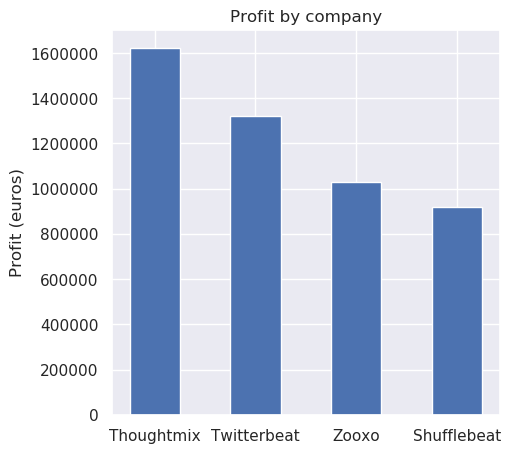

In [44]:
most_profitable_clients = get_most_profitable_clients(max_clients = 4)

companies = [x[0] for x in most_profitable_clients]
performance = [x[1] for x in most_profitable_clients]

y_pos = np.arange(len(most_profitable_clients))

plt.figure(figsize = (5,5))
plt.bar(y_pos, performance, align='center', alpha=1, width = 0.5)
plt.xticks(y_pos, companies)
plt.ylabel('Profit (euros)')
plt.title('Profit by company')

plt.show()

It is clear that Thoughtmix is the largest custumer, with more than half a million more in purchases than Zooxo. 

### Find companies that are buying less

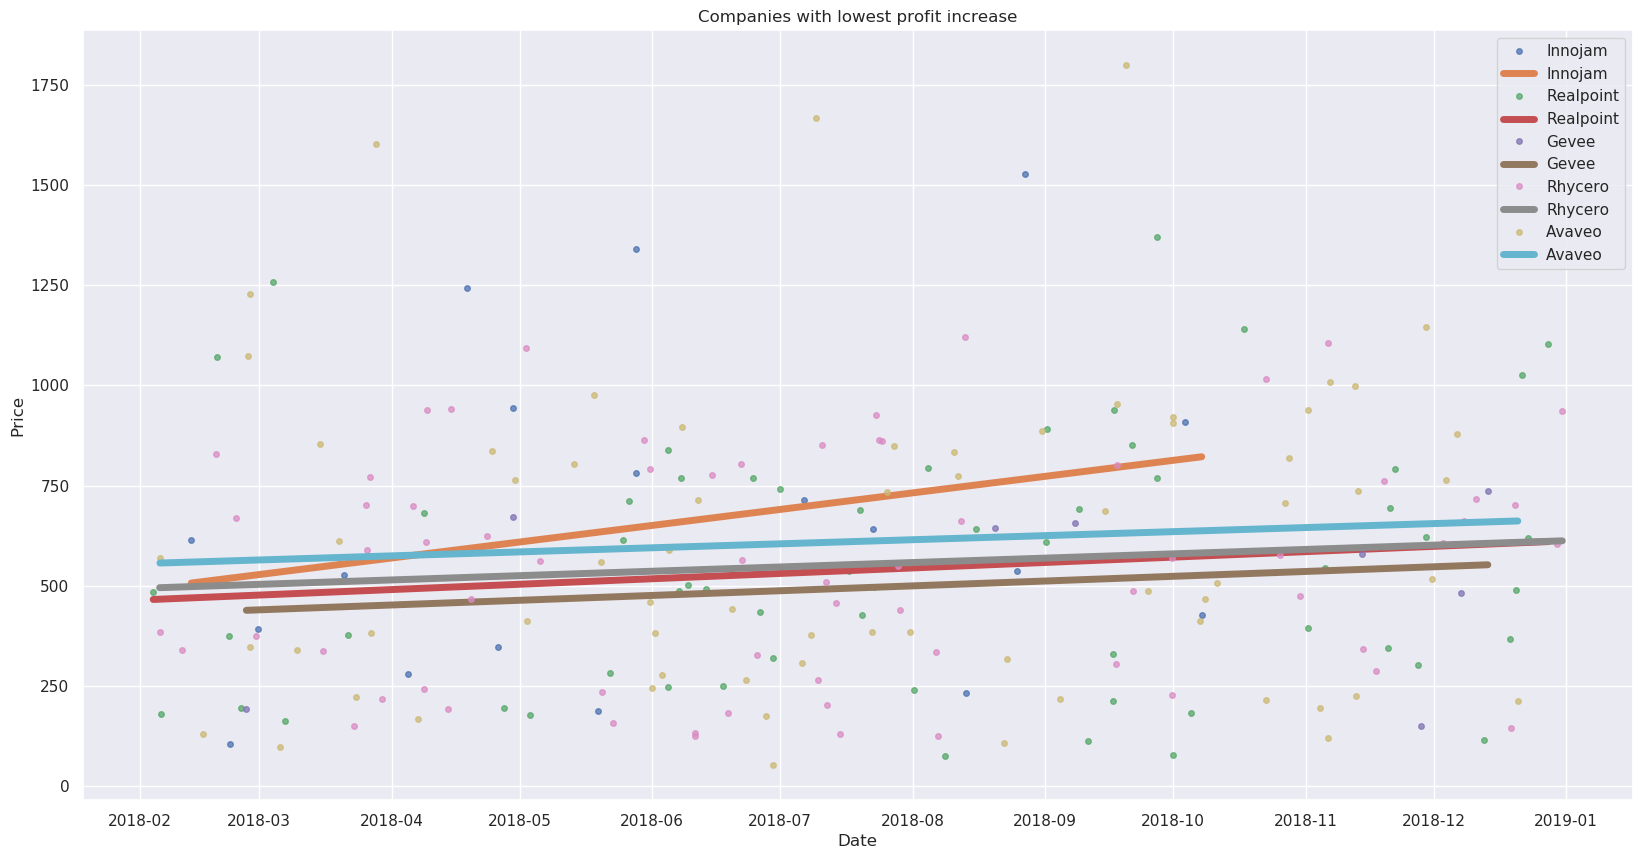

In [45]:
def get_trend_profit_company_parts(parts = False,db_file = 'customer_database.db', sales_window = "2018-01-01"):
    import scipy
    from scipy.interpolate import interp1d
    from scipy import stats
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    
    #get list of parts or companies
    if parts:
        c.execute('''SELECT DISTINCT T.part AS part
                      FROM TRANSACTIONS AS T''')
    else:
        c.execute('''SELECT DISTINCT c.company AS cmp
                      FROM COMPANIES AS C''')
    query_result = c.fetchall()
        
    companies_parts = list(itertools.chain(*query_result))
    
    output = {}

    #cycle through companies or parts
    for company_part in companies_parts:
        
        # get the transaction history
        if parts:
            c.execute('''SELECT T.date, T.price AS Revenue 
                        FROM TRANSACTIONS AS T
                        WHERE T.part = \"{}\" AND T.date > \"{}\"
                        ORDER BY T.date DESC'''.format(company_part, sales_window))
        else:
            c.execute('''SELECT T.date, T.price AS Revenue 
                        FROM COMPANIES AS C 
                        INNER JOIN TRANSACTIONS AS T 
                        ON C.ID = T.COMPANY_ID 
                        WHERE C.company = \"{}\" AND T.date > \"{}\"
                        ORDER BY T.date DESC'''.format(company_part, sales_window))
        query_result = c.fetchall()
        
        # parse the results by finding the trend
        sales = [x[1] for x in query_result]
        dates = [datetime.datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S')  for x in query_result]
        dates_seconds = [(datetime.datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S') - datetime.datetime(1970,1,1)).total_seconds() for x in query_result]

        if(len(dates)> 1):
            # use scipy to fit a straight line
            slope, intercept, _, _,_ = stats.linregress(dates_seconds,sales)
            #save everything to allow output
            output[company_part] = {"slope": slope, "intercept": intercept, "dates": dates, "sales": sales}
        else:
            #error message, does not stop the function from working though
            print("NOT ENOUGH DATAPOINTS FOR COMPANY {} TO ESTIMATE SLOPE".format(company_part))
    
    conn.close()
    
    return output

def get_highest_losers(db_file = 'customer_database.db', num_companies = 5):
    company_data = get_trend_profit_company_parts(sales_window = "2018-02-01")

    # sort the data
    data_sorted = [(k, v) for k, v in sorted(company_data.items(), key=lambda x: x[1]["slope"], reverse = True)]
    count = 0

    #create a nice plot
    plt.figure(figsize = (20,10))
    plt.title("Companies with lowest profit increase")
    plt.xlabel("Date")
    plt.ylabel("Price")
    for i in range(num_companies):
        company = data_sorted[i][0]
        data = data_sorted[i][1]
        dates = matplotlib.dates.date2num(data["dates"])
        dates_seconds = np.array([(x - datetime.datetime(1970,1,1)).total_seconds() for x in data["dates"]])
        plt.plot_date(dates, data["sales"], 'o', label = company, markersize = 4, alpha = 0.75)

        plt.plot(dates, data["intercept"] + data["slope"]*dates_seconds, label = company, linewidth = 5)

    plt.legend()
    plt.show()
        

get_highest_losers()

It looks postive for the company as none of their costumers appear to be decreasing their purchase volume. However it would be worth looking into if there is a way to make them purchase more.

### Parts popularity



In [46]:
def get_trend_popularity_parts(db_file = 'customer_database.db', sales_window = "2018-01-01"):
    import scipy
    from scipy.interpolate import interp1d
    from scipy import stats
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    c.execute('''SELECT DISTINCT T.part AS part
                  FROM TRANSACTIONS AS T''')
   
    query_result = c.fetchall()
        
    part_list = list(itertools.chain(*query_result))
    
    output = {}

    for part in part_list:

        c.execute('''SELECT strftime("%Y %m", T.date), count(T.part) AS part_count 
                        FROM TRANSACTIONS AS T
                        WHERE T.part = \"{}\" AND T.date > \"{}\"
                        GROUP BY strftime("%Y %m", T.date)
                        ORDER BY T.date DESC'''.format(part, sales_window))
       
        query_result = c.fetchall()

        sales = [x[1] for x in query_result]
        dates = [datetime.datetime.strptime(x[0], '%Y %m')  for x in query_result]
        dates_seconds = [(datetime.datetime.strptime(x[0], '%Y %m') - datetime.datetime(1970,1,1)).total_seconds() for x in query_result]

        if(len(dates)> 1):
            #fit a line
            slope, intercept, _, _,_ = stats.linregress(dates_seconds,sales)
            # store data
            output[part] = {"slope": slope, "intercept": intercept, "dates": dates, "sales": sales}
        else:
            print("NOT ENOUGH DATAPOINTS FOR COMPANY {} TO ESTIMATE SLOPE".format(part))
    
    
    conn.close()
    
    return output

In [47]:
def get_popularity_parts(most_popular = True, db_file = 'customer_database.db', num_parts = 5):
    company_data = get_trend_popularity_parts(sales_window = "2018-01-01")

    #sort the data
    data_sorted = [(k, v) for k, v in sorted(company_data.items(), key=lambda x: x[1]["slope"], reverse = most_popular)]
    count = 0

    #create a nice plot
    plt.figure(figsize = (20,10))
    most_notmost = "least"
    if most_popular:
        most_notmost = "most"
    plt.title("Parts that are {} popular".format(most_notmost))
    plt.xlabel("Date")
    plt.ylabel("Sales")
    for i in range(num_parts):
        part = data_sorted[i][0]
        data = data_sorted[i][1]
        dates = matplotlib.dates.date2num(data["dates"])
        dates_seconds = np.array([(x - datetime.datetime(1970,1,1)).total_seconds() for x in data["dates"]])
        plt.plot_date(dates, data["sales"], 'o', label = part, markersize = 4, alpha = 0.75)

        plt.plot(dates, data["intercept"] + data["slope"]*dates_seconds, label = company, linewidth = 5)

    plt.legend()
    plt.show()

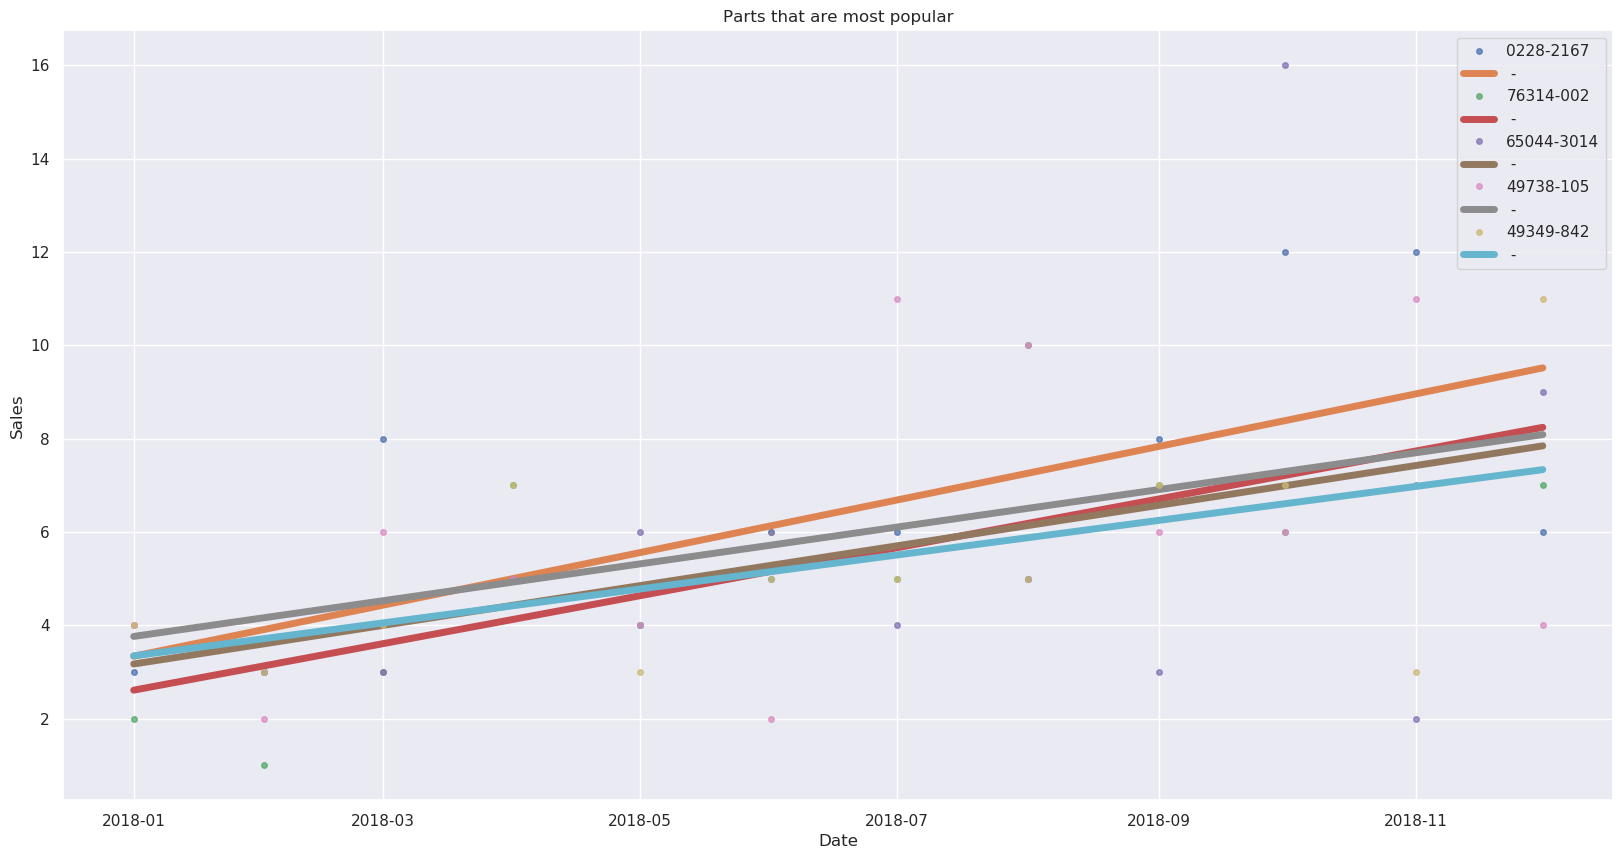

In [48]:
get_popularity_parts()

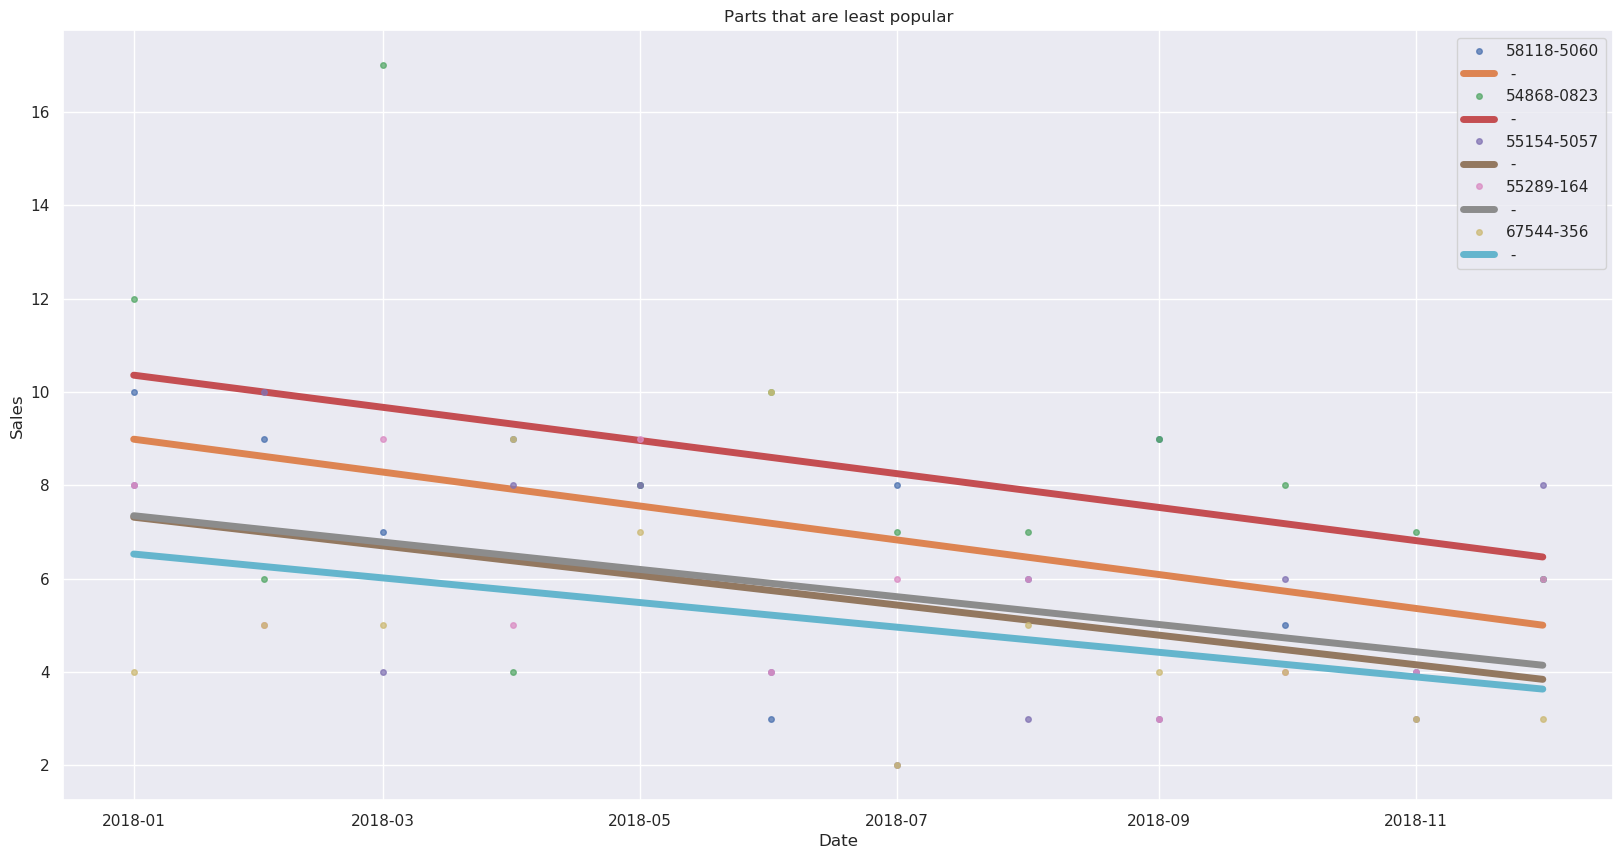

In [49]:
get_popularity_parts(most_popular = False)

These two graphs help identify those parts that are becoming more popular and less popular. We can see that there are good exampels of both and the company should consider producing more of the ones that are becoming more popular and less of those that are becoming less popular.

### Find highest grossing months

In [50]:
def get_popular_months(db_file = 'customer_database.db'):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    #group by month, this way all years and days are ignored and group together when they have the same month
    c.execute('''SELECT strftime("%m", T.date) AS Month, sum(price) AS Revenue 
                    FROM COMPANIES AS C 
                    INNER JOIN TRANSACTIONS AS T 
                    ON C.ID = T.COMPANY_ID 
                    GROUP BY strftime("%m", T.date)''')
    query_result = c.fetchall()
    
    conn.close()
    
    return query_result

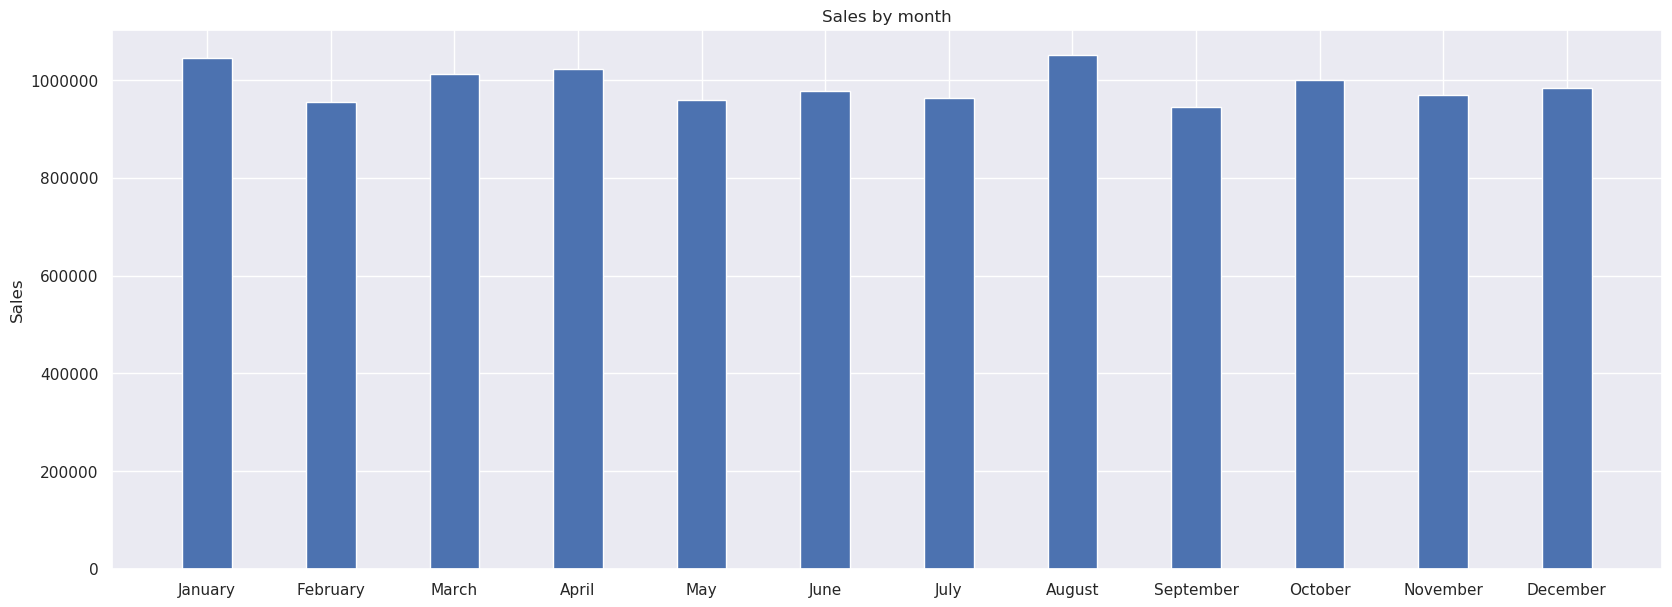

In [51]:
# use calendar to display the name of the month
import calendar
popular_months = get_popular_months()
    
months = [calendar.month_name[int(x[0])] for x in popular_months]
sales = [x[1] for x in popular_months]

y_pos = np.arange(len(popular_months))

plt.figure(figsize = (20,7))
plt.bar(y_pos, sales, align='center', alpha=1, width = 0.4)
plt.xticks(y_pos, months)
plt.ylabel('Sales')
plt.title('Sales by month')

plt.show()

Interestingly, it does not appear that a there are seasonal trends on the buyers puchasing patterns. This is good for the company as it indicated a steady uniform income for the company, with no low seasons. It could be considered if seasonal offers may increase profit.

### Highest grossing countries

In [52]:
def get_popular_countries(db_file = 'customer_database.db'):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    # group by contry
    c.execute('''SELECT C.country AS Country, sum(price) AS Revenue 
                    FROM COMPANIES AS C 
                    INNER JOIN TRANSACTIONS AS T 
                    ON C.ID = T.COMPANY_ID 
                    GROUP BY C.country''')
    query_result = c.fetchall()
    
    conn.close()
    
    return query_result

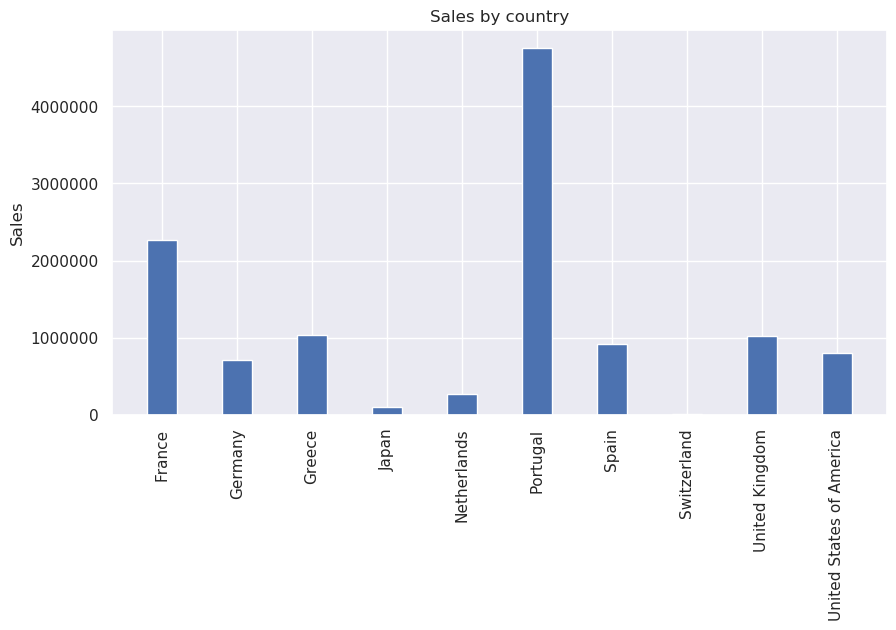

In [53]:
popular_countries = get_popular_countries()
    
countries = [x[0] for x in popular_countries]
sales = [x[1] for x in popular_countries]

y_pos = np.arange(len(popular_countries))

plt.figure(figsize = (10,5))
plt.bar(y_pos, sales, align='center', alpha=1, width = 0.4)
plt.xticks(y_pos, countries, rotation = "vertical")
plt.ylabel('Sales')
plt.title('Sales by country')

plt.show()

From this it is clear that Portugal is a very big market for the company. Looking into our presence in the market may help us tab further into it. France which is  fairly near by is also prominent, alogn side other west european countries is a great indicator of our strongest market region.

### Highest grossing parts

In [54]:
def get_average_price_parts(db_file = 'customer_database.db'):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    # group by part
    c.execute('''SELECT T.part AS Part, avg(price) AS Revenue 
                    FROM TRANSACTIONS AS T 
                    GROUP BY T.part''')
    query_result = c.fetchall()
    
    conn.close()
    
    return query_result

def get_avg_highest_grossing(db_file = 'customer_database.db', num_parts = 5):
    avgs = get_average_price_parts()
    data_sorted = sorted(avgs, key=lambda x: x[1], reverse = True)
    
    return_parts = len(data_sorted)
    if(num_parts > 0):
        return_parts = num_parts
    return data_sorted[:return_parts]
        

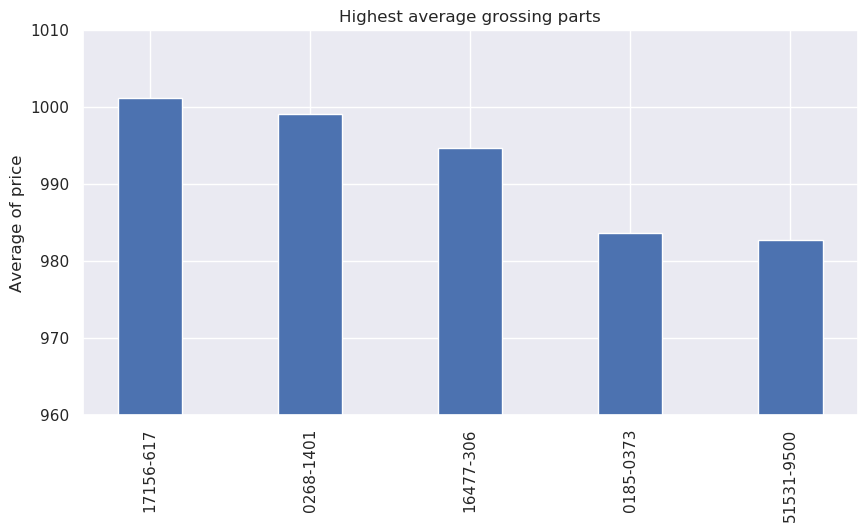

In [55]:
grossing_parts = get_avg_highest_grossing()
    
parts = [x[0] for x in grossing_parts]
sales = [x[1] for x in grossing_parts]

y_pos = np.arange(len(grossing_parts))

plt.figure(figsize = (10,5))
plt.ylim(960, 1010)
plt.bar(y_pos, sales, align='center', alpha=1, width = 0.4)
plt.xticks(y_pos, parts, rotation = "vertical")
plt.ylabel('Average of price')
plt.title('Highest average grossing parts')

plt.show()

The histogram has  a modified y-axis to better show the difference in average price of the part sold. We can see that there is only one part with an average price over the history of the company above 1000 euros. By looking at this histogram we would also be able to say that there is not a group of parts which is much more pricy than the others.

### Find trend in sales of parts

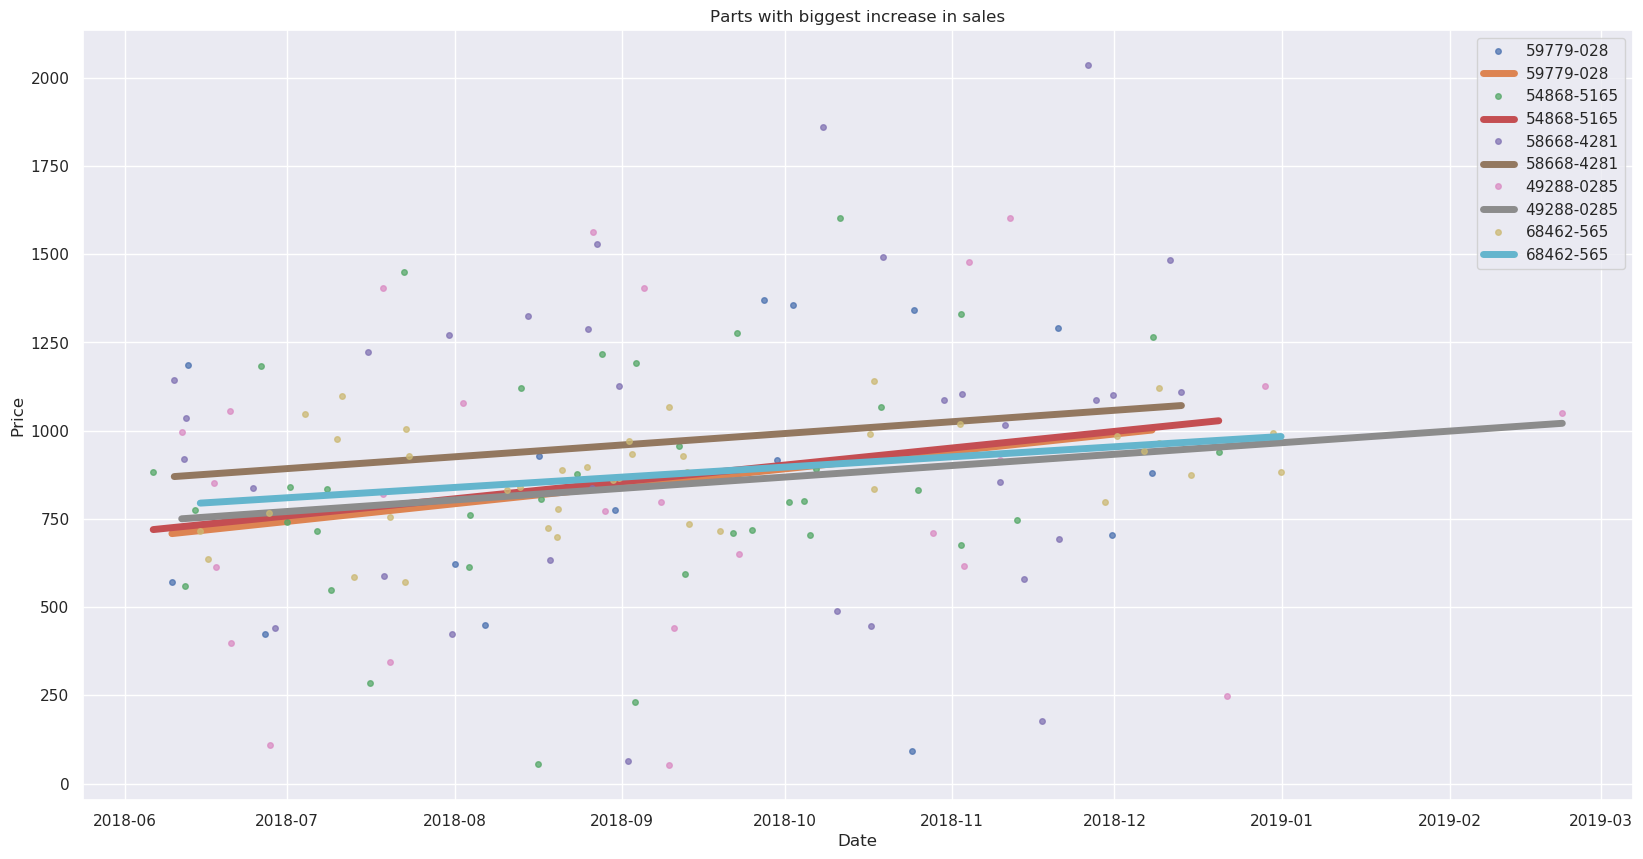

In [56]:
def get_highest_grossing_parts(db_file = 'customer_database.db', num_parts = 5):
    # use the function defined previously
    parts_data = get_trend_profit_company_parts(parts = True, sales_window = "2018-06-01")
    data_sorted = [(k, v) for k, v in sorted(parts_data.items(), key=lambda x: x[1]["slope"], reverse = True)]
    count = 0
    
    plt.figure(figsize = (20,10))
    plt.title("Parts with biggest increase in sales")
    plt.xlabel("Date")
    plt.ylabel("Price")
    for i in range(num_parts):
        part = data_sorted[i][0]
        data = data_sorted[i][1]
        dates = matplotlib.dates.date2num(data["dates"])
        dates_seconds = np.array([(x - datetime.datetime(1970,1,1)).total_seconds() for x in data["dates"]])
        plt.plot_date(dates, data["sales"], 'o', label = part, markersize = 4, alpha = 0.75)

        plt.plot(dates, data["intercept"] + data["slope"]*dates_seconds, label = part, linewidth = 5)

    plt.legend()
    plt.show()
        

get_highest_grossing_parts()

From both trend graphs in this report, it can be deduced that the company appear to be overall growing.

**Comment on queries** We used a combination of SQL, to fetch the data and perform preliminary statistics, and Python, to further analyze the data, find trends and plot everything in a meaningful way. While doing this we found a certain degree of modularity, where by changing few parameters many different statistics could be found. We merged a few of these things into functions, but decided to keep it more separate than one would do otherwise to have a more clear understading of all the working parts in each of the query.

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

---
### Solution

We create an index to speed up the queries that operate on the `date` column, because all the popular queries involve the date column. Considering the number of columns in the `TRANSACTIONS` table, adding indexes on other columns could increase the size of the table to a size that is not acceptable anymore and the improvement in performance would not justify the higher cost in storage, this is why we decide to only add one index.

In [57]:
conn = sqlite3.connect('customer_database.db')
c = conn.cursor()
create_index = "CREATE INDEX index_dates ON TRANSACTIONS(DATE)"
c.execute(create_index)
conn.commit()
conn.close()

#### Show all sales to company X between time $t_1$ and time $t_2$

In [58]:
def get_sales_in_period(db_file = 'customer_database.db',company = "Flipstorm", starting = "2017-01-01", ending = "2022-01-01", limit = 500):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    # WHERE the right company and the time delta
    c.execute('''SELECT T.part AS Part, T.date AS Date, T.price AS Price
                 FROM COMPANIES AS C 
                 INNER JOIN TRANSACTIONS AS T 
                 ON C.ID = T.COMPANY_ID 
                 WHERE T.date > \"{}\" AND T.date < \"{}\" AND C.company = "{}"
                 ORDER BY T.date DESC
                 LIMIT {}'''.format(starting, ending, company, limit))
    out = c.fetchall()
    conn.close()
    return out

In [ ]:
%%time
get_sales_in_period(limit = -1)

In [60]:
# a straightforward way to answer the last question would be the following
def get_sales_in_period_slow():
    start_date = datetime.datetime.strptime("2017-01-01", '%Y-%m-%d')
    end_date = datetime.datetime.strptime("2022-01-01", '%Y-%m-%d')
    company = "Flipstorm"
    #cycle through every line, very simply
    sales_in_period = []
    for i in range(len(old_transactions)):
        if(old_transactions.loc[i]["company"] == "Flipstorm"):
            if(old_transactions.loc[i]["date"]>start_date and old_transactions.loc[i]["date"]<end_date):
                sales_in_period.append((old_transactions.loc[i]['part'], old_transactions.loc[i]['date'], old_transactions.loc[i]['price']))
    return sales_in_period  

In [ ]:
%%time
get_sales_in_period_slow()

With this comparison it becomes immediately clear that without using a database the time that it takes to search through every record is very costly. This is why we do not repeat the same experiment also for the other queries but instead just show the speed of executing them using sqlite3 and Python.

Other than the speed advantage that comes from indexing the columns used by the most popular queries, a relational database helps in maintaining the structure and consistency of the data through time. For example, it's clear that if information on the parts being sold was to be added, it would be a matter of creating a new table and linking it to the list of transactions, without having to modify every row.

#### Show the latest X sales in the database

Here a straightforward approach would mean ordering all the rows by date and then selecting the first X rows, which without indexing would require a lond time.

In [62]:
def get_last_sales(db_file = 'customer_database.db', X = 500):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    # use LIMIT to limit the number of rows in the output
    # ordering by date ensures it's the last transactions by date
    c.execute('''SELECT * 
                FROM COMPANIES AS C 
                INNER JOIN TRANSACTIONS AS T 
                ON C.ID = T.COMPANY_ID 
                ORDER BY T.date DESC LIMIT {}'''.format(X))
    out = c.fetchall()
    conn.close()
    return out

In [ ]:
%%time
get_last_sales()

#### Show total sales per company per day

A straightforward approach would mean looking though every line and accumulating the sales for that company in that day. Without an index in the sales column this is incredibly costly. By adding an index in the company column the query would become even faster.

In [64]:
def get_tot_sales_cmp_day(db_file = 'customer_database.db'):
    conn = sqlite3.connect(db_file)
    c = conn.cursor()
    c.execute(''' SELECT ID, Company FROM COMPANIES ''')
    company_map = c.fetchall()

    total_sales = {}
    #go through each company
    for company_id, company in company_map:
        # group by the day, ignore the time of day
        c.execute('''SELECT strftime("%Y%m%d", T.date) as Day, 
                    SUM(T.price) as Earnings
                    FROM TRANSACTIONS AS T 
                    WHERE T.company_id = {}
                    GROUP BY Day'''.format(company_id))
        out = c.fetchall()
        total_sales[company] = out
    conn.close()
    return total_sales

In [ ]:
%%time
get_tot_sales_cmp_day()

---